In [1]:
from astropy.nddata import NDDataArray as nda, StdDevUncertainty as sdu
from astropy.table import Table, column
import astropy.units as u
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

import sys
sys.path.append('../astro_codes/')

In [2]:
morph_data = Table.read('fits/morph_data.fits')
structure_data = Table.read('fits/structure_data.fits')
hi_data = Table.read('fits/hi_data.fits')

masks = Table.read('fits/masks.fits')
halo_data = Table.read('fits/halo_table_all.fits')
halo_data_w_gas = Table.read('fits/halo_table_all_w_gas.fits')

gz2_data = Table.read('../fits/full_sample_debiased_w_low_z_mod.fits')

In [3]:
halo_data['M_baryonic'] = halo_data['M_disc_total'] + halo_data['M_bulge']
halo_data['bulge_frac'] = halo_data['M_bulge'] / halo_data['M_baryonic']
halo_data['disc_frac'] = halo_data['M_disc_total'] / halo_data['M_baryonic']
halo_data['halo_frac'] = halo_data['M_halo'] / halo_data['M_baryonic']

halo_data['M_total_2.2'] = (halo_data['M_disc_total_2.2']
                          + halo_data['M_bulge_2.2']
                          + halo_data['M_halo_2.2'])

halo_data['bulge_frac_2.2'] = halo_data['M_bulge_2.2']/halo_data['M_total_2.2']
halo_data['disc_frac_2.2'] = halo_data['M_disc_total_2.2']/halo_data['M_total_2.2']
halo_data['halo_frac_2.2'] = halo_data['M_halo_2.2']/halo_data['M_total_2.2']

############################

halo_data_w_gas['M_baryonic'] = halo_data_w_gas['M_disc_total'] + halo_data_w_gas['M_bulge']
halo_data_w_gas['bulge_frac'] = halo_data_w_gas['M_bulge'] / halo_data_w_gas['M_baryonic']
halo_data_w_gas['disc_frac'] = halo_data_w_gas['M_disc_total'] / halo_data_w_gas['M_baryonic']
halo_data_w_gas['halo_frac'] = halo_data_w_gas['M_halo'] / halo_data_w_gas['M_baryonic']

halo_data_w_gas['M_total_2.2'] = (halo_data_w_gas['M_disc_total_2.2']
                          + halo_data_w_gas['M_bulge_2.2']
                          + halo_data_w_gas['M_halo_2.2'])

halo_data_w_gas['bulge_frac_2.2'] = halo_data_w_gas['M_bulge_2.2']/halo_data_w_gas['M_total_2.2']
halo_data_w_gas['disc_frac_2.2'] = halo_data_w_gas['M_disc_total_2.2']/halo_data_w_gas['M_total_2.2']
halo_data_w_gas['halo_frac_2.2'] = halo_data_w_gas['M_halo_2.2']/halo_data_w_gas['M_total_2.2']

5.0th percentile = 0.0
10.0th percentile = 0.0020000000949949026
15.0th percentile = 0.014000000432133675
20.0th percentile = 0.0430000014603138
25.0th percentile = 0.0860000029206276
30.0th percentile = 0.13600000739097595
35.0th percentile = 0.1889999955892563
40.0th percentile = 0.24199999868869781
45.0th percentile = 0.2919999957084656
50.0th percentile = 0.3370000123977661
55.0th percentile = 0.37700000405311584
60.0th percentile = 0.41200000047683716
65.0th percentile = 0.4429999887943268
70.0th percentile = 0.4699999988079071
75.0th percentile = 0.49300000071525574
80.0th percentile = 0.5149999856948853
85.0th percentile = 0.5550000071525574
90.0th percentile = 0.6349999904632568
95.0th percentile = 0.7879999876022339


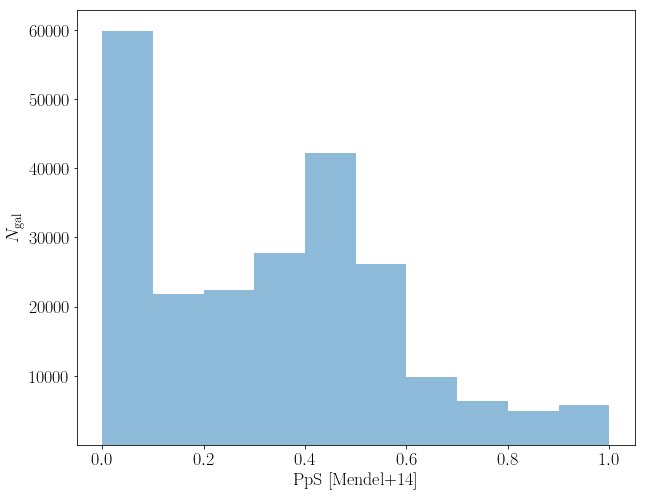

In [4]:
has_mendel = structure_data['ok']
_ = plt.hist(structure_data['PpS_mendel'][has_mendel],alpha=0.5)

for p in np.linspace(5,95,19):
    percentile = np.percentile(structure_data['PpS_mendel'][has_mendel],p)
    print('{}th percentile = {}'.format(p,percentile))
    
_ = plt.xlabel('PpS [Mendel+14]')
_ = plt.ylabel('$N_\mathrm{gal}$')

In [5]:
# --- sample selection:

redshift_ok = masks['in_redshift']
redshift_ok = np.all([morph_data['redshift'] >= 0.01,
                      morph_data['redshift'] <= 0.085],axis=0)
hi_ok = masks['hi_ok']

# Check the structure:
disc_ok = structure_data['PpS_mendel'] <= 0.32 # Mendel+ 2-component system
axial_ok = morph_data['axial_ratio'] >= 0.4 # Hart+17, Masters+10
fit_ok = structure_data['ok']
mass_ok = masks['mass_ok']

star_forming = masks['star_forming']

m = halo_data['m_predicted_2R_d']
m_w_gas = halo_data_w_gas['m_predicted_2R_d']
m_ok = np.all([m <= 20, m_w_gas <= 20],axis=0)

p_spiral_ok = np.isfinite(morph_data['p_spiral'])

sample_ok = np.all([redshift_ok,hi_ok,mass_ok,fit_ok,
                    disc_ok,axial_ok,m_ok,p_spiral_ok],axis=0)
sf_sample = np.all([sample_ok,star_forming],axis=0)
non_sf_sample = np.all([sample_ok,star_forming == False],axis=0)

print('{} discs in the final sample'.format(sample_ok.sum()))
print('{} are SF'.format(sf_sample.sum()))
print('{} are none-SF'.format(non_sf_sample.sum()))

52209 discs in the final sample
25617 are SF
26592 are none-SF


#### First: comparison w and w/o gas

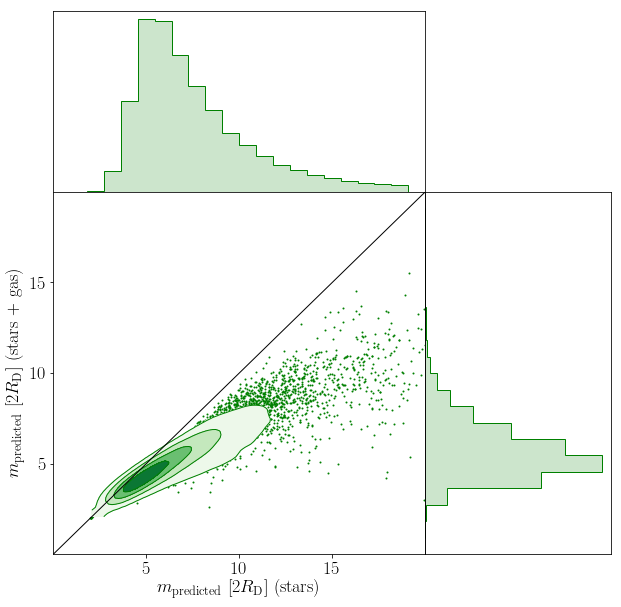

In [6]:
from compare_xy import make_figure, comparison_plot
from contours import kde_contour

x = m[sample_ok]
y = m_w_gas[sample_ok]

bins = np.linspace(0,20,21)

fig, axarr = make_figure()
_ = axarr[0].hist(x,bins,normed=True,
                  color='g',histtype='stepfilled',alpha=0.2)
_ = axarr[0].hist(x,bins,normed=True,
                  color='g',lw=1,histtype='step')

_ = axarr[1].hist(y,bins,normed=True,
                  color='g',histtype='stepfilled',alpha=0.2,
                  orientation='horizontal')
_ = axarr[1].hist(y,bins,normed=True,
                  color='g',lw=1,histtype='step',
                  orientation='horizontal')

plt.sca(axarr[2])
_ = kde_contour(x,y,fill=True,zorder=1,
                fill_properties={'colormap':'Greens'},
                line_properties={'color':'g'})
_ = axarr[2].scatter(x[:5000],y[:5000],
                     color='g',s=1,zorder=0,
                     rasterized=True)
_ = axarr[2].plot([0,20],[0,20],color='k',lw=1)
_ = axarr[2].set_xlim(0,20)
_ = axarr[2].set_ylim(0,20)
_ = axarr[2].set_yticks([5,10,15])
_ = axarr[2].set_xlabel('$m_\mathrm{predicted}$ [$2R_\mathrm{D}$] (stars)')
_ = axarr[2].set_ylabel('$m_\mathrm{predicted}$ [$2R_\mathrm{D}$] (stars + gas)')

#fig.savefig('figures/mp_vs_mp.pdf')

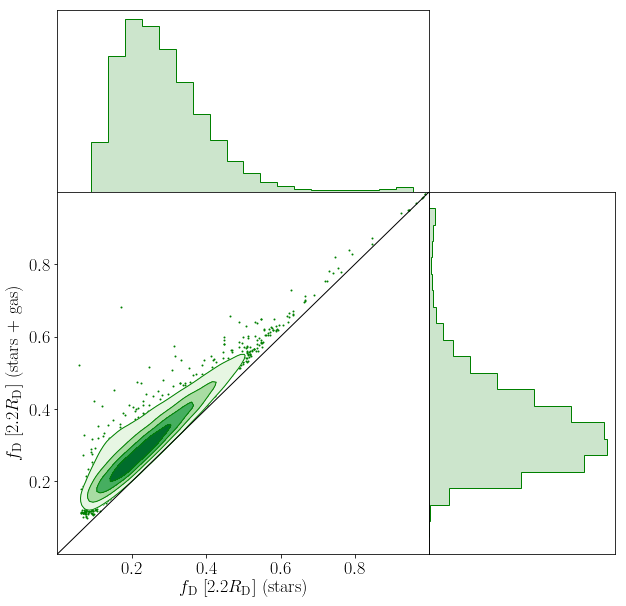

In [7]:
x = halo_data['disc_frac_2.2'][sample_ok]
y = halo_data_w_gas['disc_frac_2.2'][sample_ok]

bins = np.linspace(0,1,21)

fig, axarr = make_figure()
_ = axarr[0].hist(x,bins,normed=True,
                  color='g',histtype='stepfilled',alpha=0.2)
_ = axarr[0].hist(x,bins,normed=True,
                  color='g',lw=1,histtype='step')

_ = axarr[1].hist(y,bins,normed=True,
                  color='g',histtype='stepfilled',alpha=0.2,
                  orientation='horizontal')
_ = axarr[1].hist(y,bins,normed=True,
                  color='g',lw=1,histtype='step',
                  orientation='horizontal')

plt.sca(axarr[2])
_ = kde_contour(x,y,fill=True,zorder=1,
                fill_properties={'colormap':'Greens'},
                line_properties={'color':'g'})
_ = axarr[2].scatter(x[:5000],y[:5000],
                     color='g',s=1,zorder=0,
                     rasterized=True)
_ = axarr[2].plot([0,1],[0,1],color='k',lw=1)
_ = axarr[2].set_xlim(0,1)
_ = axarr[2].set_ylim(0,1)
_ = axarr[2].set_xlabel('$f_\mathrm{D}$ [$2.2R_\mathrm{D}$] (stars)')
_ = axarr[2].set_ylabel('$f_\mathrm{D}$ [$2.2R_\mathrm{D}$] (stars + gas)')

fig.savefig('figures/fd_vs_fd.pdf')

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


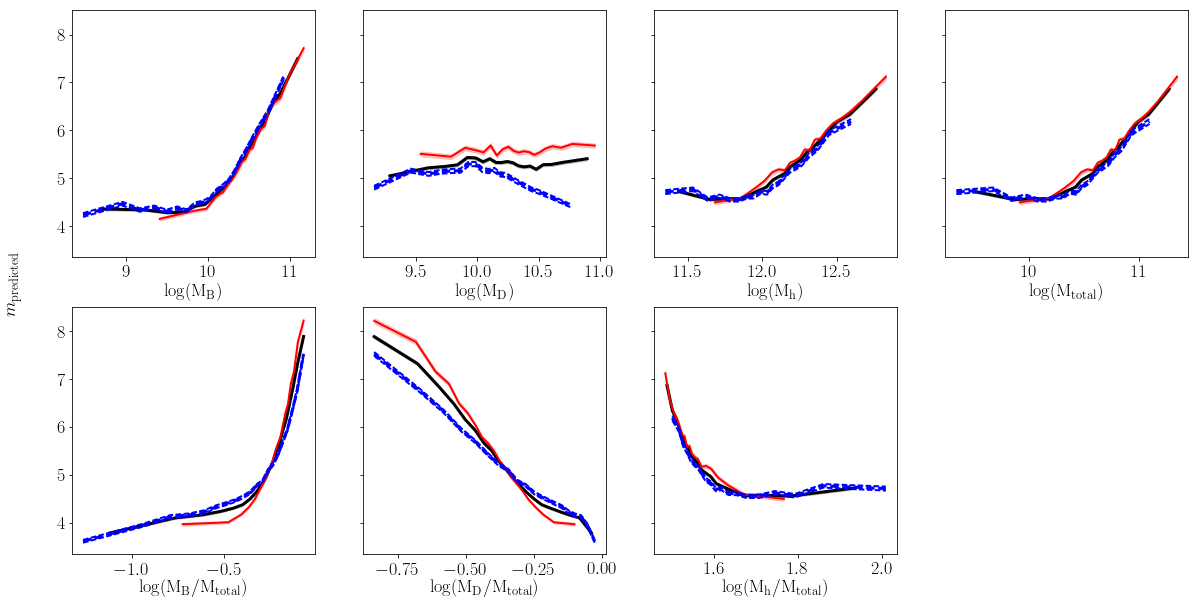

In [148]:
from xy_plots import x_vs_y

fig, axarr = plt.subplots(2,4,figsize=(20,10),sharey=True)
axarr = axarr.ravel()
fig.delaxes(axarr[-1])

y = halo_data_w_gas['m_predicted_2R_d']
x_columns = ['M_bulge','M_disc_stars','M_halo','M_baryonic',
             'bulge_frac','disc_frac','halo_frac']
xs = [np.log10(halo_data[c]) for c in x_columns]
xlabels = ['$\log(\mathrm{M_B})$','$\log(\mathrm{M_D})$',
           '$\log(\mathrm{M_h})$','$\log(\mathrm{M_{total}})$',
           '$\log(\mathrm{M_B/M_{total}})$','$\log(\mathrm{M_D/M_{total}})$',
           '$\log(\mathrm{M_h/M_{total}})$']

colors = 'rbkyrbk'

for x, xlabel, ax, color in zip(xs,xlabels,axarr,colors):
    
    xy = x_vs_y(x[sample_ok],y[sample_ok])
    xy.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy.line_plot(ax,color='k',lw=3,linestyle='solid')
    xy.error_plot(ax,color='k',style='filled',
                  alpha=0.2)
    
    xy_nsf = x_vs_y(x[non_sf_sample],y[non_sf_sample])
    xy_nsf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_nsf.line_plot(ax,color='r',lw=2)
    xy_nsf.error_plot(ax,color='r',alpha=0.2)
    
    xy_sf = x_vs_y(x[sf_sample],y[sf_sample])
    xy_sf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_sf.line_plot(ax,color='b',lw=3,linestyle='dashed')
    xy_sf.error_plot(ax,color='b',style='lined',lw=2,linestyle='dashed')
    
    ax.set_xlabel(xlabel)
    
_ = fig.text(0.08, 0.5, '$m_\mathrm{predicted}$', va='center', rotation='vertical')

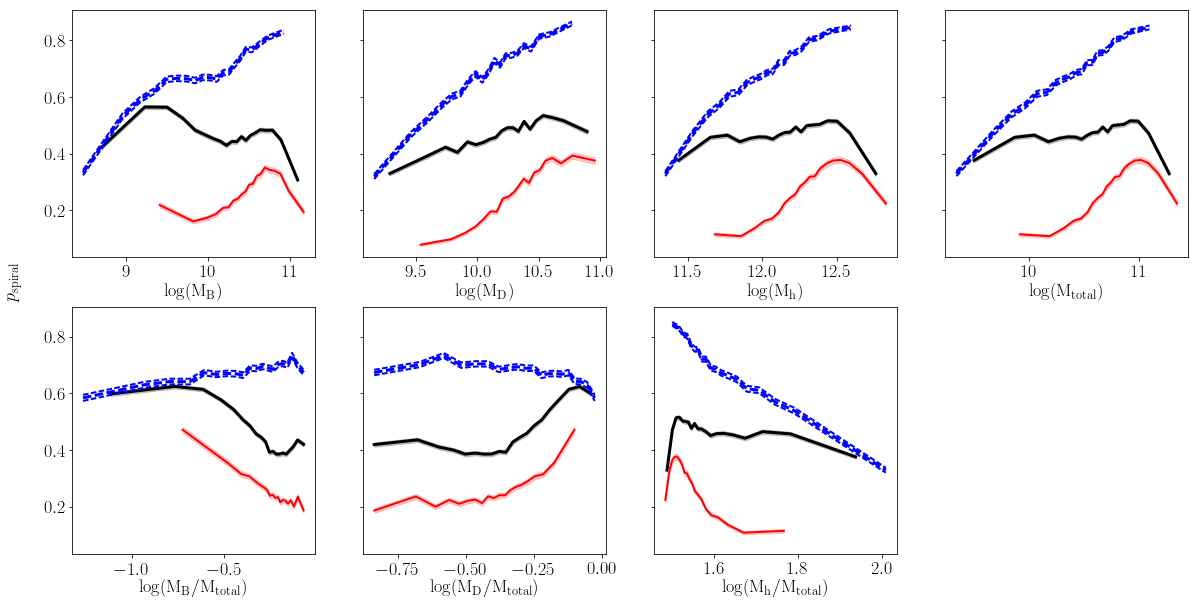

In [149]:
#### Now: is there a notable drop off in p_spiral at that mass?
fig, axarr = plt.subplots(2,4,figsize=(20,10),sharey=True)
axarr = axarr.ravel()
fig.delaxes(axarr[-1])

y = morph_data['p_spiral']

for x, xlabel, ax, color in zip(xs,xlabels,axarr,colors):
    
    xy = x_vs_y(x[sample_ok],y[sample_ok])
    xy.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy.line_plot(ax,color='k',lw=3,linestyle='solid')
    xy.error_plot(ax,color='k',style='filled',
                  alpha=0.2)
    
    xy_nsf = x_vs_y(x[non_sf_sample],y[non_sf_sample])
    xy_nsf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_nsf.line_plot(ax,color='r',lw=2)
    xy_nsf.error_plot(ax,color='r',alpha=0.2)
    
    xy_sf = x_vs_y(x[sf_sample],y[sf_sample])
    xy_sf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_sf.line_plot(ax,color='b',lw=3,linestyle='dashed')
    xy_sf.error_plot(ax,color='b',style='lined',lw=2,linestyle='dashed')
    
    ax.set_xlabel(xlabel)
    
_ = fig.text(0.08, 0.5, '$p_\mathrm{spiral}$', va='center', rotation='vertical')

#### Now make equivalent plots at 2.2R_d?

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


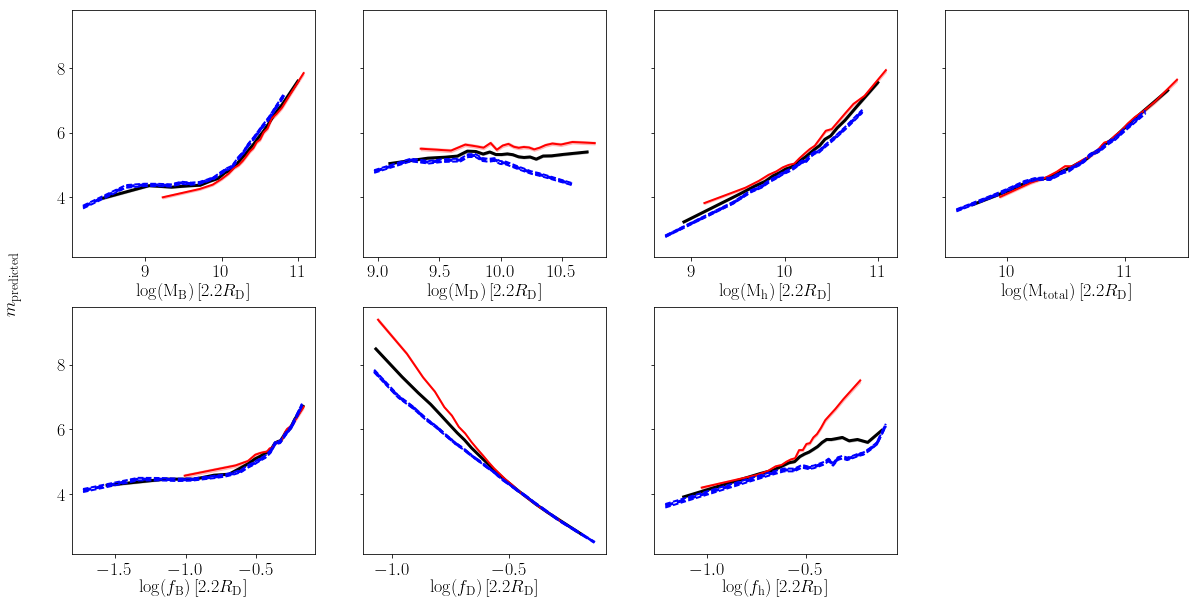

In [150]:
fig, axarr = plt.subplots(2,4,figsize=(20,10),sharey=True)
axarr = axarr.ravel()
fig.delaxes(axarr[-1])

y = halo_data_w_gas['m_predicted_2R_d']
x_columns = ['M_bulge_2.2','M_disc_stars_2.2','M_halo_2.2','M_total_2.2',
             'bulge_frac_2.2','disc_frac_2.2','halo_frac_2.2']
xs = [np.log10(halo_data[c]) for c in x_columns]
xlabels = ['$\log(\mathrm{M_B}) \, [2.2R_\mathrm{D}]$',
           '$\log(\mathrm{M_D}) \, [2.2R_\mathrm{D}]$',
           '$\log(\mathrm{M_h}) \, [2.2R_\mathrm{D}]$',
           '$\log(\mathrm{M_{total}}) \, [2.2R_\mathrm{D}]$',
           '$\log(f_\mathrm{B}) \, [2.2R_\mathrm{D}]$',
           '$\log(f_\mathrm{D}) \, [2.2R_\mathrm{D}]$',
           '$\log(f_\mathrm{h}) \, [2.2R_\mathrm{D}]$']

colors = 'rbkyrbk'

for x, xlabel, ax, color in zip(xs,xlabels,axarr,colors):
    
    xy = x_vs_y(x[sample_ok],y[sample_ok])
    xy.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy.line_plot(ax,color='k',lw=3,linestyle='solid')
    xy.error_plot(ax,color='k',style='filled',
                  alpha=0.2)
    
    xy_nsf = x_vs_y(x[non_sf_sample],y[non_sf_sample])
    xy_nsf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_nsf.line_plot(ax,color='r',lw=2)
    xy_nsf.error_plot(ax,color='r',alpha=0.2)
    
    xy_sf = x_vs_y(x[sf_sample],y[sf_sample])
    xy_sf.continuous_vs_continuous_binned_mean(bins=20,equal_N=True)
    xy_sf.line_plot(ax,color='b',lw=3,linestyle='dashed')
    xy_sf.error_plot(ax,color='b',style='lined',lw=2,linestyle='dashed')
    
    ax.set_xlabel(xlabel)
    
_ = fig.text(0.08, 0.5, '$m_\mathrm{predicted}$', va='center', rotation='vertical')

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater_equal


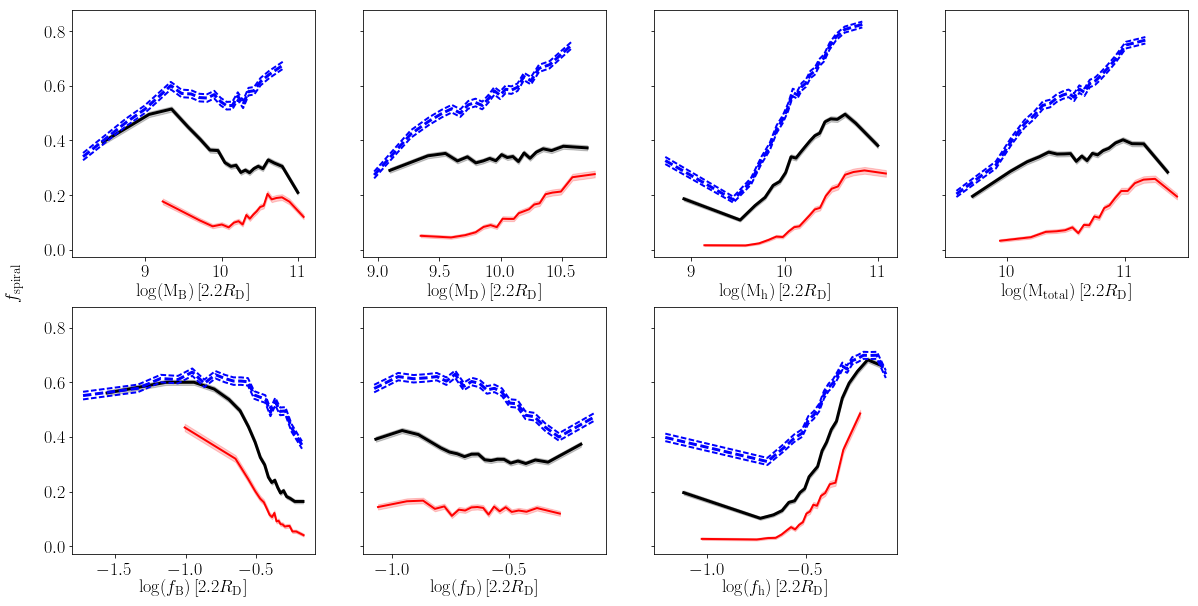

In [151]:
#### Now: is there a notable drop off in p_spiral at that mass?
fig, axarr = plt.subplots(2,4,figsize=(20,10),sharey=True)
axarr = axarr.ravel()
fig.delaxes(axarr[-1])

y = np.all([morph_data['p_spiral'] >= 0.5,
            morph_data['N_spiral'] >= 5],axis=0)

for x, xlabel, ax, color in zip(xs,xlabels,axarr,colors):
    
    xy = x_vs_y(x[sample_ok],y[sample_ok])
    xy.fraction_with_feature(bins=20,equal_N=True)
    xy.line_plot(ax,color='k',lw=3,linestyle='solid')
    xy.error_plot(ax,color='k',style='filled',
                  alpha=0.2)
    
    xy_nsf = x_vs_y(x[non_sf_sample],y[non_sf_sample])
    xy_nsf.fraction_with_feature(bins=20,equal_N=True)
    xy_nsf.line_plot(ax,color='r',lw=2)
    xy_nsf.error_plot(ax,color='r',alpha=0.2)
    
    xy_sf = x_vs_y(x[sf_sample],y[sf_sample])
    xy_sf.fraction_with_feature(bins=20,equal_N=True)
    xy_sf.line_plot(ax,color='b',lw=3,linestyle='dashed')
    xy_sf.error_plot(ax,color='b',style='lined',lw=2,linestyle='dashed')
    
    ax.set_xlabel(xlabel)
    
_ = fig.text(0.08, 0.5, '$f_\mathrm{spiral}$', va='center', rotation='vertical')

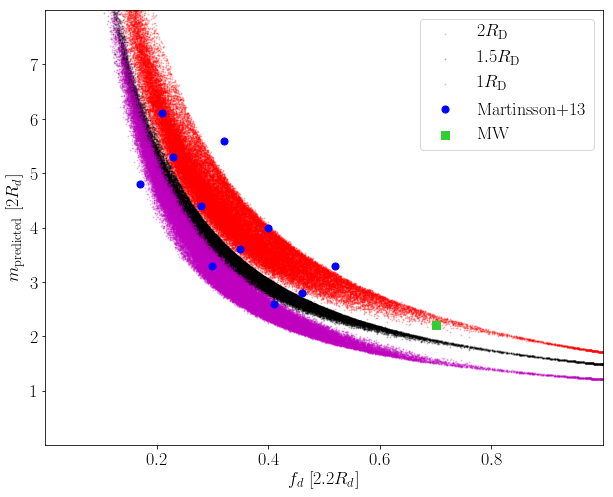

In [152]:
_ = plt.scatter(halo_data_w_gas['disc_frac_2.2'][sample_ok],
                halo_data_w_gas['m_predicted_2R_d'][sample_ok]*(1.5/1.75),
                color='r',s=1,alpha=0.2,label='$2R_\mathrm{D}$')

_ = plt.scatter(halo_data_w_gas['disc_frac_2.2'][sample_ok],
                halo_data_w_gas['m_predicted_1.5R_d'][sample_ok]*(1.5/1.75),
                color='k',s=1,alpha=0.2,label='$1.5R_\mathrm{D}$')

_ = plt.scatter(halo_data_w_gas['disc_frac_2.2'][sample_ok],
                halo_data_w_gas['m_predicted_1R_d'][sample_ok]*(1.5/1.75),
                color='m',s=1,alpha=0.2,label='$1R_\mathrm{D}$')

_ = plt.xlim(0,1)
_ = plt.ylim(0,8)

xmarkers = [0.21,0.17,0.32,0.4,0.46,0.52,0.28,0.41,0.35,0.23,0.3]
ymarkers = [6.1,4.8,5.6,4,2.8,3.3,4.4,2.6,3.6,5.3,3.3]
_ = plt.scatter(xmarkers,ymarkers,s=50,color='b',marker='o',
                label='Martinsson+13')

_ = plt.scatter(0.7,2.2,color='limegreen',s=50,marker='s',label='MW')

_ = plt.xlabel('$f_d$ [$2.2R_d$]')
_ = plt.ylabel('$m_\mathrm{predicted}$ [$2R_d$]')
_ = plt.legend()

#### What have we learned here?

We see that galaxies with more massive discs are predicted to have fewer spiral arms. We see that there is no drop-off in the Galaxy Zoo $p_\mathrm{spiral}$ statistic with predicted arm number.

Now: form either a $f_\mathrm{D}$ - $m$ space or an $m_\mathrm{predicted}$ - $m$ space to investigate any correlations with Galaxy Zoo data.

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


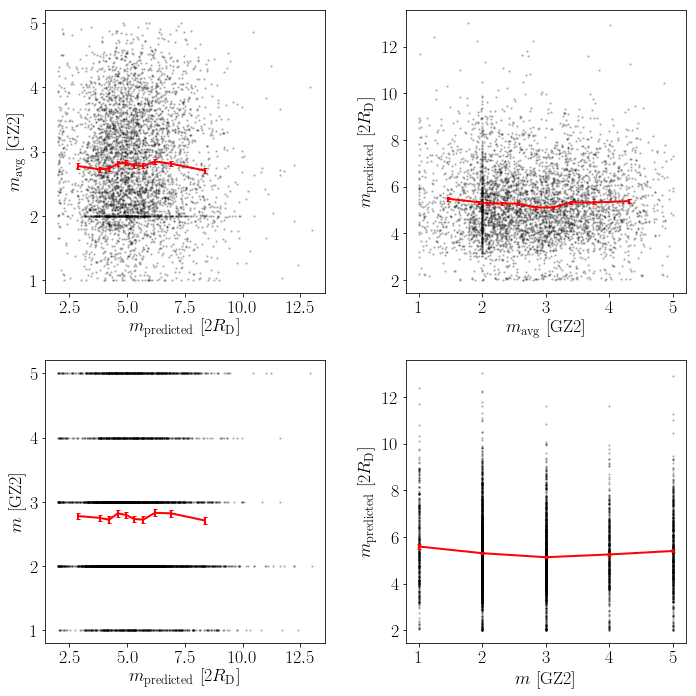

In [153]:
p_spiral = morph_data['p_spiral']
N_spiral = morph_data['N_spiral']
p_bar = morph_data['p_bar']

spiral_ok = np.all([p_spiral > 0.5,N_spiral >= 5, p_bar <= 0.2],axis=0)
spiral_sample = np.all([sample_ok,spiral_ok],axis=0)
spiral_sf = np.all([sf_sample,spiral_ok],axis=0)
spiral_non_sf = np.all([non_sf_sample,spiral_ok],axis=0)

x = halo_data_w_gas['m_predicted_2R_d'][spiral_sample]
y0 = morph_data['m_avg'][spiral_sample]
y1 = morph_data['m'][spiral_sample]

xys = [x_vs_y(x,y0).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(y0,x).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(x,y1).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(y1,x).discrete_vs_continuous_binned_mean()]

xy_data = [(x,y0),(y0,x),(x,y1),(y1,x)]

xlabels = ('$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m_\mathrm{avg}$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m$ [GZ2]')

ylabels = ('$m_\mathrm{avg}$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]')


fig, axarr = plt.subplots(2,2,figsize=(10,10))
axarr = axarr.ravel()

for ax, xy, xy_, xlabel, ylabel in zip(axarr,xys,xy_data,xlabels,ylabels):
    ax.scatter(xy_[0],xy_[1],color='k',s=2,alpha=0.2)
    xy.error_plot(ax,style='errorbar',color='r',lw=2,capsize=2)
    _ = ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)
    
fig.tight_layout()

#### The last thing we can do for this section: look for a third variable which we perhaps expect to correlate with modal spiral arms

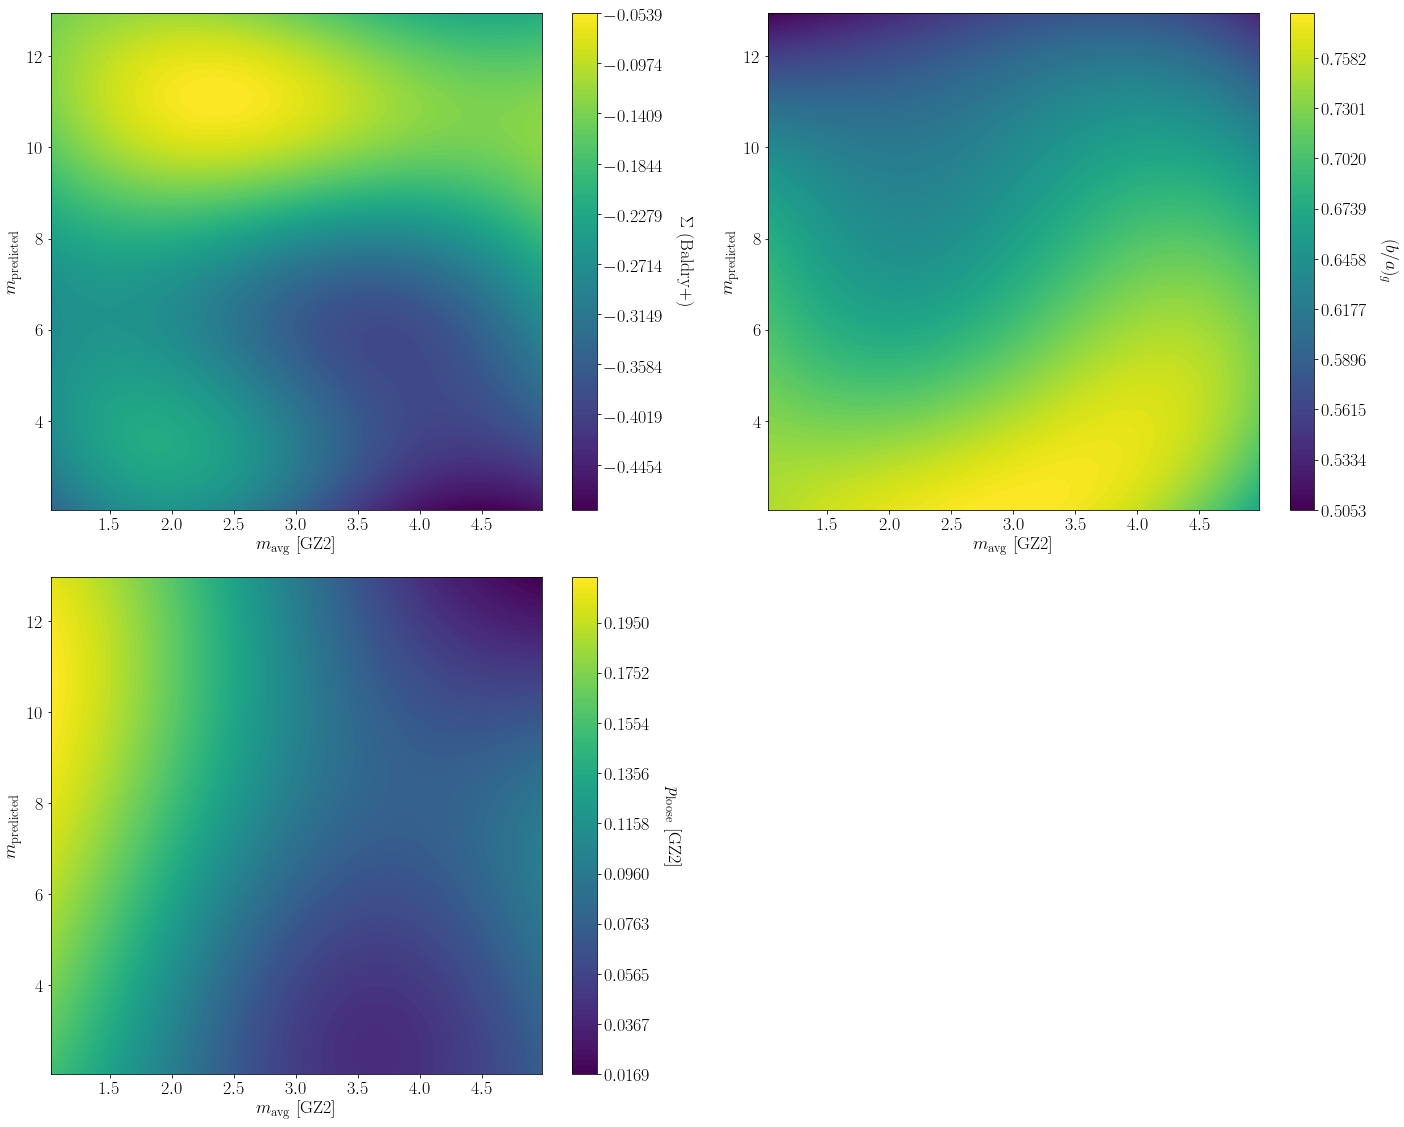

In [133]:
from contours3 import xyz_contour

x = morph_data['m_avg'][spiral_sample]
y = halo_data_w_gas['m_predicted_2R_d'][spiral_sample]
z = gz2_data['IVAN_DENSITY'][spiral_sample]

fig, axarr = plt.subplots(2,2,figsize=(20,16))
axarr = axarr.ravel()

#############################
ax = axarr[0]
plt.sca(ax)
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$\Sigma$ (Baldry+)', rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

#############################
ax = axarr[1]
plt.sca(ax)
z = morph_data['axial_ratio'][spiral_sample]
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$(b/a)_g$', rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

#############################
ax = axarr[2]
plt.sca(ax)
z = gz2_data['t10_arms_winding_a30_loose_debiased_rh'][spiral_sample]
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$p_\mathrm{loose}$ [GZ2]', rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

fig.delaxes(axarr[-1])
fig.tight_layout()

#### What I've learned from D'Onghia+13

Spiral arms are seeded by a pertubation. The pertubatioon in question is the formation of GMCs. therefore, we expect spiral arms to form modally when GMCs are present. This may manifest itself in three detectable ways:

- Total SFR: if the molecular gas fraction is high, more GMCs can form.
- $SFR_{22}/SFR_{FUV}$: this is an interesting one. in Hart+17a, we postualted that the GMCs are larger in more dust obscured galaxies: a greater level of dust obscuration may be indicative of clumpy GMCs, which could seed spiral arms.
- $f_\mathrm{gas}$: if the atomic gas fraction is higher, then the molecular gas fraction may be higher, but I believe the correlation is fairly loose (eg. Fig. 8 of Saintonge+11a). 

In [134]:
# Load the SFR data:
sfrs = Table.read('../fits/SF_fits/sfrs+ids.fits')

has_sfr = np.all([sfrs['F'] >= 2,sfrs['w4'] >= 2],axis=0) 
# ^ note to self: check this is the selection of Hart+17a
spiral_sample_w_sfr = np.all([spiral_sample,has_sfr],axis=0)
print('{} spirals have measured SFRS'.format(spiral_sample_w_sfr.sum()))

f_gas = 1 - (halo_data_w_gas['M_disc_stars']
           / halo_data_w_gas['M_disc_total'])

1387 spirals have measured SFRS


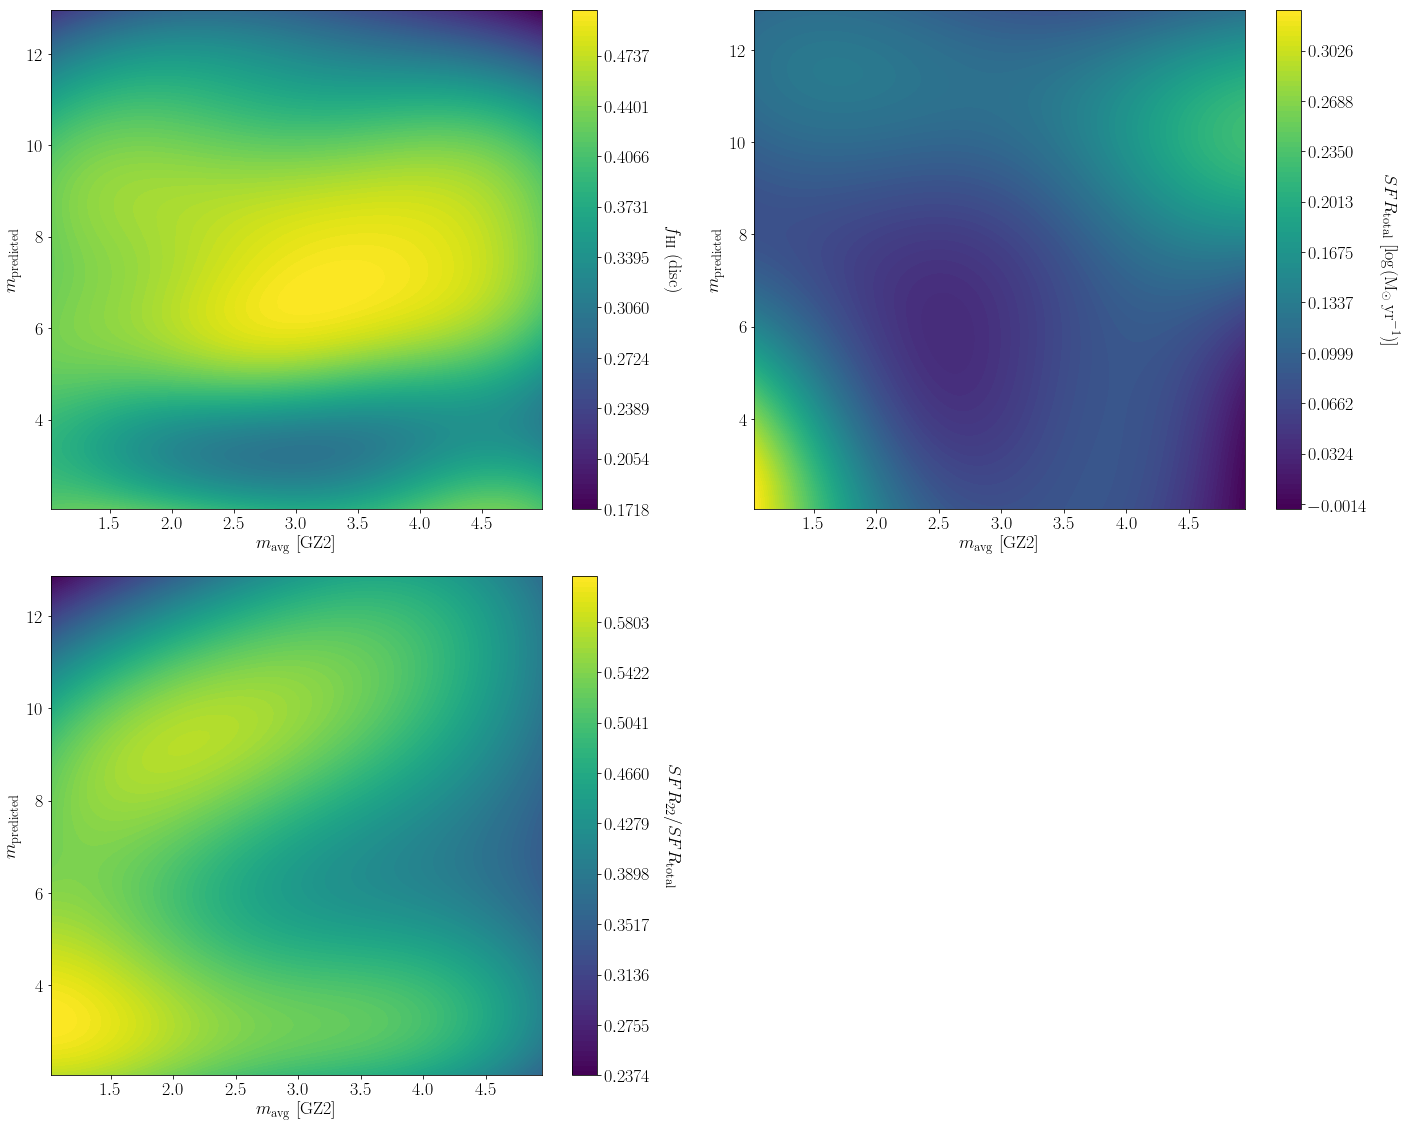

In [135]:
x = morph_data['m_avg'][spiral_sample]
y = halo_data_w_gas['m_predicted_2R_d'][spiral_sample]
z = f_gas[spiral_sample]

fig, axarr = plt.subplots(2,2,figsize=(20,16))
axarr = axarr.ravel()

#############################
ax = axarr[0]
plt.sca(ax)
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$f_\mathrm{HI}$ (disc)', rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

#############################
ax = axarr[1]
plt.sca(ax)
x = morph_data['m_avg'][spiral_sample_w_sfr]
y = halo_data_w_gas['m_predicted_2R_d'][spiral_sample_w_sfr]
z = sfrs['sfr_total'][spiral_sample_w_sfr]
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$SFR_\mathrm{total}$ [$\log(\mathrm{M_\odot \, yr^{-1}})$]' , rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

#############################
ax = axarr[2]
plt.sca(ax)
z = sfrs['mir_fraction'][spiral_sample_w_sfr]
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 30
cbar.set_label('$SFR_\mathrm{22}/SFR_\mathrm{total}$', rotation=270)
_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

fig.delaxes(axarr[-1])
fig.tight_layout()

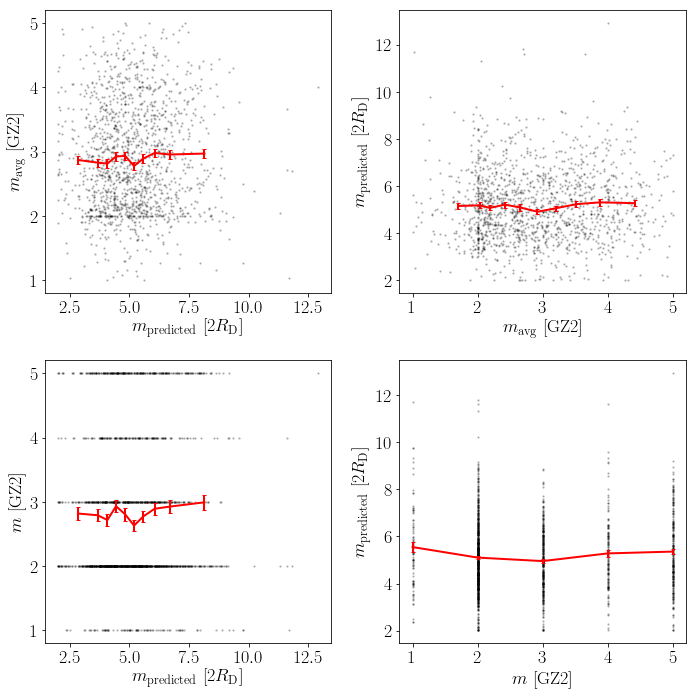

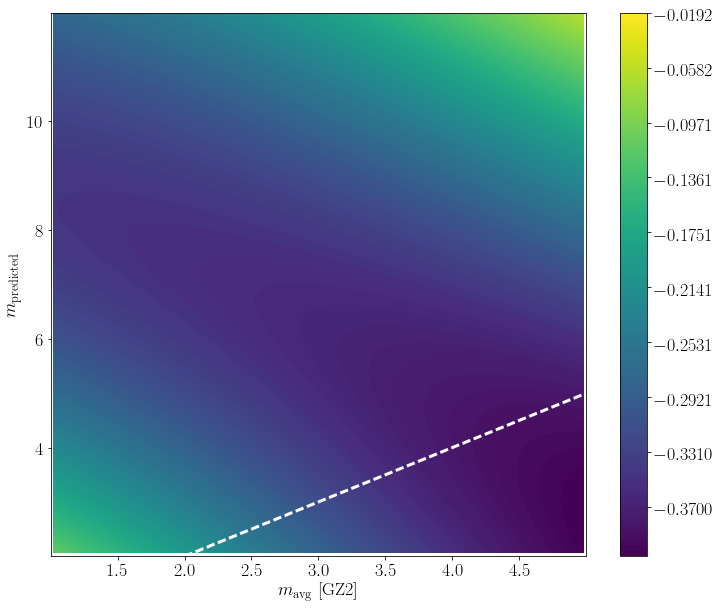

In [68]:
#### Now make the plots above for a really low-z sample?
low_z = gz2_data['REDSHIFT_1'] <= 0.04
low_z_spiral_sample = np.all([spiral_sample,low_z],axis=0)

x = halo_data_w_gas['m_predicted_2R_d'][low_z_spiral_sample]
y0 = morph_data['m_avg'][low_z_spiral_sample]
y1 = morph_data['m'][low_z_spiral_sample]

xys = [x_vs_y(x,y0).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(y0,x).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(x,y1).continuous_vs_continuous_binned_mean(equal_N=True),
       x_vs_y(y1,x).discrete_vs_continuous_binned_mean()]

xy_data = [(x,y0),(y0,x),(x,y1),(y1,x)]

xlabels = ('$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m_\mathrm{avg}$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m$ [GZ2]')

ylabels = ('$m_\mathrm{avg}$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]',
           '$m$ [GZ2]',
           '$m_\mathrm{predicted}$ [$2R_\mathrm{D}$]')


fig, axarr = plt.subplots(2,2,figsize=(10,10))
axarr = axarr.ravel()

for ax, xy, xy_, xlabel, ylabel in zip(axarr,xys,xy_data,xlabels,ylabels):
    ax.scatter(xy_[0],xy_[1],color='k',s=2,alpha=0.2)
    xy.error_plot(ax,style='errorbar',color='r',lw=2,capsize=2)
    _ = ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)
    
fig.tight_layout()

####################################################
x = morph_data['m_avg'][low_z_spiral_sample]
y = halo_data_w_gas['m_predicted_2R_d'][low_z_spiral_sample]
z = gz2_data['IVAN_DENSITY'][low_z_spiral_sample]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)

#_ = plt.scatter(x,y,c=z,cmap=plt.cm.coolwarm)
_ = xyz_contour(x,y,z,fill_properties={'colormap':'viridis'})
_ = plt.colorbar()

_ = ax.set_xlabel('$m_\mathrm{avg}$ [GZ2]')
_ = ax.set_ylabel('$m_\mathrm{predicted}$')

x_g = np.linspace(2,5,100)
y_g = np.linspace(2,5,100)
_ = ax.plot(x_g,y_g,'w--',lw=3)
_ = ax.set_xlim(1,5)
_ = ax.set_ylim(2,12)

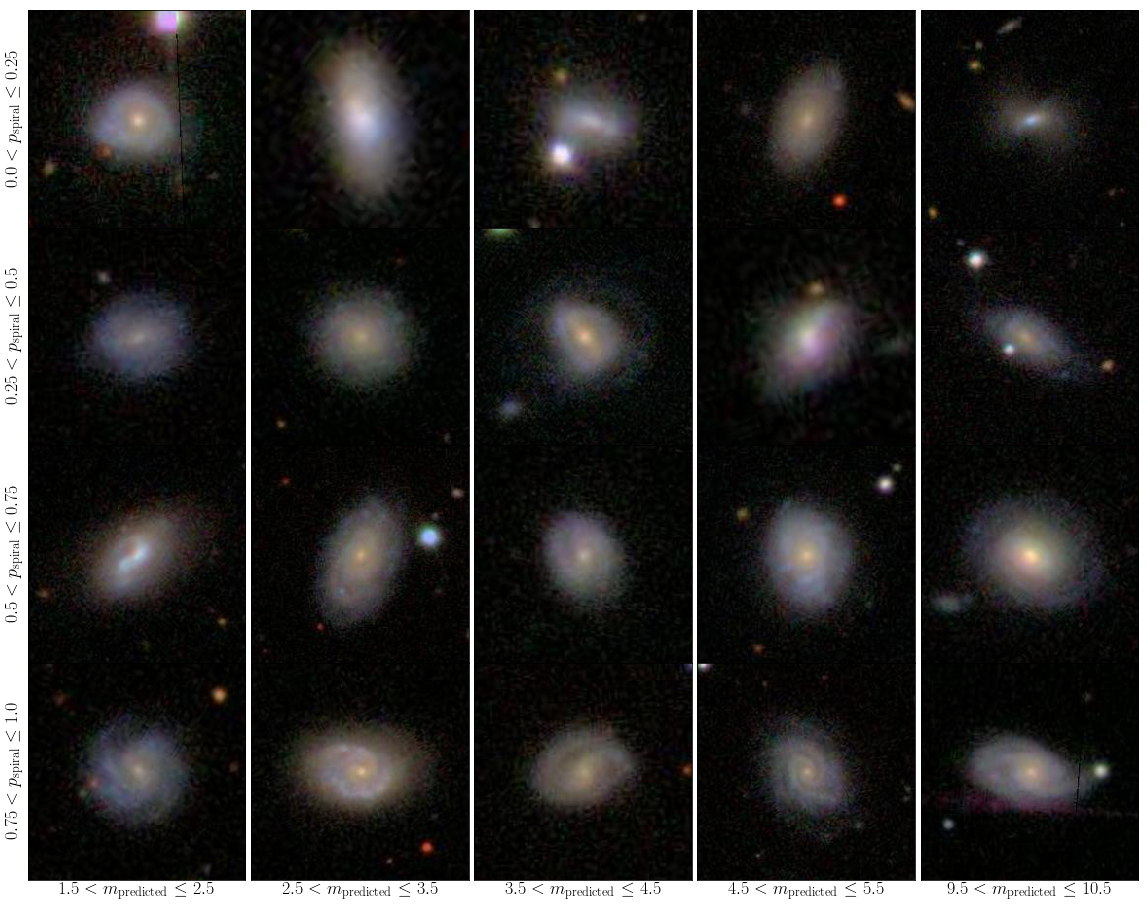

In [39]:
from display_image import display_image

sf_sample_low_z = np.all([low_z,sf_sample],axis=0)

np.random.seed(2)

subsample_data = gz2_data[sf_sample_low_z]
subsample_p = morph_data['p_spiral'][sf_sample_low_z]
subsample_m = halo_data['m_predicted_2R_d'][sf_sample_low_z]

p_bins = np.linspace(0,1,5)
m_vals = (2,3,4,5,10)

N_m = len(m_vals)
N_p = len(p_bins) - 1

fig, axarr = plt.subplots(N_p,N_m,
                          figsize=(20,N_p/N_m*20))

fig.subplots_adjust(wspace=0,hspace=0)

for p in range(N_p):
    for m in range(N_m):
        in_p = np.all([subsample_p > p_bins[p],
                       subsample_p <= p_bins[p+1]],axis=0)
        
        in_m = np.all([subsample_m > m_vals[m]-0.5,
                       subsample_m <= m_vals[m]+0.5],axis=0)
        
        plt.sca(axarr[p,m])
        galaxy_row = np.random.choice(subsample_data[(in_p) & (in_m)])
        url = galaxy_row['jpeg_url']
        _ = display_image(url)

for a, ax in enumerate(axarr[:,0]):
    ax.set_ylabel('${} < p_\mathrm{{spiral}} \leq {}$'.format(p_bins[a],p_bins[a+1]))
    
for a, ax in enumerate(axarr[-1,:]):
    ax.set_xlabel('${} < m_\mathrm{{predicted}} \leq {}$'.format(m_vals[a]-0.5,
                                                                 m_vals[a]+0.5))

#### Case study: two arm spirals?

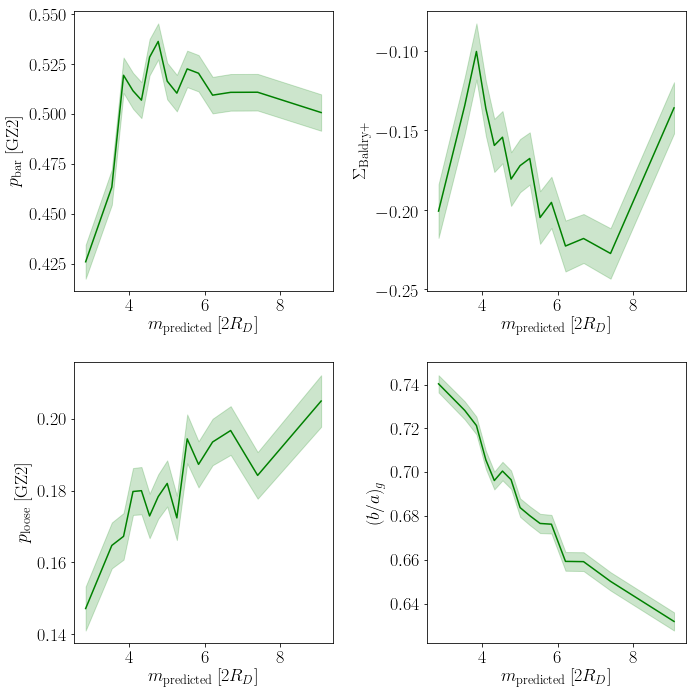

In [84]:
two_arm_sample = np.all([sample_ok,morph_data['m'] == 2],axis=0)

fig, axarr = plt.subplots(2,2,figsize=(10,10))
axarr = axarr.ravel()

ax = axarr[0]
x = halo_data_w_gas['m_predicted_2R_d'][two_arm_sample]
y = morph_data['p_bar'][two_arm_sample]
#_ = ax.scatter(x,y,color='k',s=2,alpha=0.2)
xy = x_vs_y(x,y).continuous_vs_continuous_binned_mean(bins=15,equal_N=True)
xy.line_plot(ax,color='g')
xy.error_plot(ax,color='g',alpha=0.2)
_ = ax.set_xlabel('$m_\mathrm{predicted} \, [2R_D]$')
_ = ax.set_ylabel('$p_\mathrm{bar}$ [GZ2]')

ax = axarr[1]
y = gz2_data['IVAN_DENSITY'][two_arm_sample]
#_ = ax.scatter(x,y,color='k',s=2,alpha=0.2)
xy = x_vs_y(x,y).continuous_vs_continuous_binned_mean(bins=15,equal_N=True)
xy.line_plot(ax,color='g')
xy.error_plot(ax,color='g',alpha=0.2)
_ = ax.set_xlabel('$m_\mathrm{predicted} \, [2R_D]$')
_ = ax.set_ylabel('$\Sigma_\mathrm{Baldry+}$')

ax = axarr[2]
y = gz2_data['t10_arms_winding_a30_loose_debiased_rh'][two_arm_sample]
#_ = ax.scatter(x,y,color='k',s=2,alpha=0.2)
xy = x_vs_y(x,y).continuous_vs_continuous_binned_mean(bins=15,equal_N=True)
xy.line_plot(ax,color='g')
xy.error_plot(ax,color='g',alpha=0.2)
_ = ax.set_xlabel('$m_\mathrm{predicted} \, [2R_D]$')
_ = ax.set_ylabel('$p_\mathrm{loose}$ [GZ2]')

ax = axarr[3]
y = morph_data['axial_ratio'][two_arm_sample]
#_ = ax.scatter(x,y,color='k',s=2,alpha=0.2)
xy = x_vs_y(x,y).continuous_vs_continuous_binned_mean(bins=15,equal_N=True)
xy.line_plot(ax,color='g')
xy.error_plot(ax,color='g',alpha=0.2)
_ = ax.set_xlabel('$m_\mathrm{predicted} \, [2R_D]$')
_ = ax.set_ylabel('$(b/a)_g$')

_ = fig.tight_layout()

#### What can sparcfire give us?

Nothing...

In [49]:
sparcfire_data = Table.read('../sparcfire2/fits/galaxy_level_all.fits')
sparcfire_arcs = Table.read('../sparcfire2/fits/arc_table_all.fits')

In [50]:
def theta_at_r(arc_row,r):
    r_i = arc_row['math_initial_radius']
    psi = arc_row['pitch_angle']*(2*math.pi/360)
    theta_i = arc_row['math_initial_theta']
    r0 = r_i/np.exp(-psi*theta_i)
    theta_r = -np.log(r/r0)/psi
    return theta_r

def theta_difference(arcs,id_):
    id_rows = arcs['gxyName'] == id_
    id_arcs = arcs[id_rows]
    
    arc_0 = id_arcs[0]
    r_centre = arc_0['r_end'] - arc_0['r_start']
    theta_0 = theta_at_r(arc_0,r_centre)
    delta_thetas = []
    for arc_n in id_arcs[1:]:
        theta_n = theta_at_r(arc_n,r_centre)
        delta_theta = (theta_n - theta_0)*(360/(2*math.pi))
        N360 = np.floor(delta_theta/360)
        delta_thetas.append(delta_theta - N360*360)
    return delta_thetas

In [51]:
in_spiral = np.all([morph_data['p_spiral'] > 0.5,
                    morph_data['N_spiral'] >= 5],axis=0)

unbarred = morph_data['p_bar'] <= 0.2

m_2 = np.all([morph_data['m'] == 2,in_spiral],axis=0)
m_2_sample = np.all([m_2,sample_ok,unbarred],axis=0)

N_arcs = sparcfire_data['N_arcs'] 
multi_arcs = N_arcs > 1
m_2_ids = gz2_data['dr8objid'][(m_2_sample) & (multi_arcs)]

delta_theta_list = []

for id_ in m_2_ids:
    delta_theta_list.append(theta_difference(sparcfire_arcs,id_)[0])
    
delta_thetas = np.array(delta_theta_list)
delta_thetas[np.isfinite(delta_thetas) == False] = -999

arm_symmetry = np.abs(delta_thetas - 180)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
/home/ppxrh/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


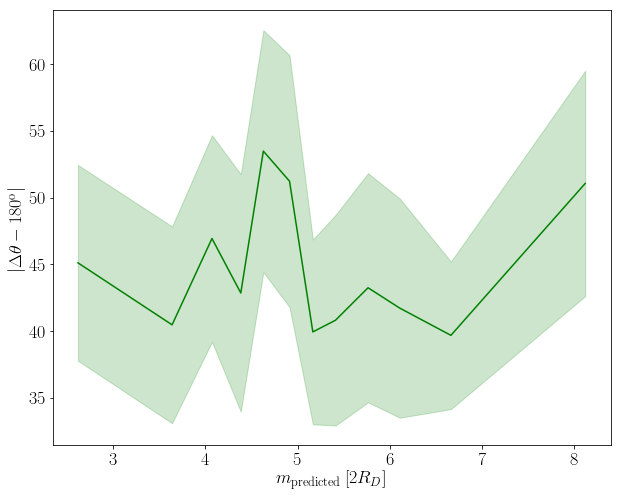

In [58]:
fig = plt.figure()
ax = plt.subplot(111)

mask = np.all([arm_symmetry > 0,arm_symmetry < 180],axis=0) 
x = halo_data_w_gas['m_predicted_2R_d'][(m_2_sample) & (multi_arcs)][mask]
y = arm_symmetry[mask]
xy = x_vs_y(x,y).continuous_vs_continuous_binned_mean(bins=12,
                                                        equal_N=True)

xy.line_plot(ax,color='g')
xy.error_plot(ax,color='g',alpha=0.2)

_ = ax.set_xlabel('$m_\mathrm{predicted} \, [2R_D]$')
_ = ax.set_ylabel(r'$|\Delta \theta - 180^{\mathrm{o}}|$')